<a href="https://colab.research.google.com/github/NithinXD/moddd-lab/blob/main/genai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Truth Table for XOR Implementation:
X1 | X2 | OR | NAND | XOR
------------------------------
0  | 0  | 0  | 1   | 0
0  | 1  | 1  | 1   | 1
1  | 0  | 1  | 1   | 1
1  | 1  | 1  | 0   | 0

Learned Weights:
OR Perceptron: Weights = [0.6309482  0.99947396], Bias = [-0.57514997]
NAND Perceptron: Weights = [-0.29134384 -0.34021322], Bias = [0.53322235]
AND Perceptron: Weights = [0.10350888 0.23688204], Bias = [-0.29074135]
Truth Table for XOR Implementation:
X1 | X2 | OR | NAND | XOR
------------------------------
0  | 0  | 0  | 1   | 0
0  | 1  | 1  | 1   | 1
1  | 0  | 1  | 1   | 1
1  | 1  | 1  | 0   | 0

Learned Weights:
OR Perceptron: Weights = [0.8096558  0.12793835], Bias = [-0.03909746]
NAND Perceptron: Weights = [-0.16082967 -0.11764333], Bias = [0.23777928]
AND Perceptron: Weights = [0.09813105 0.2508197 ], Bias = [-0.28396454]


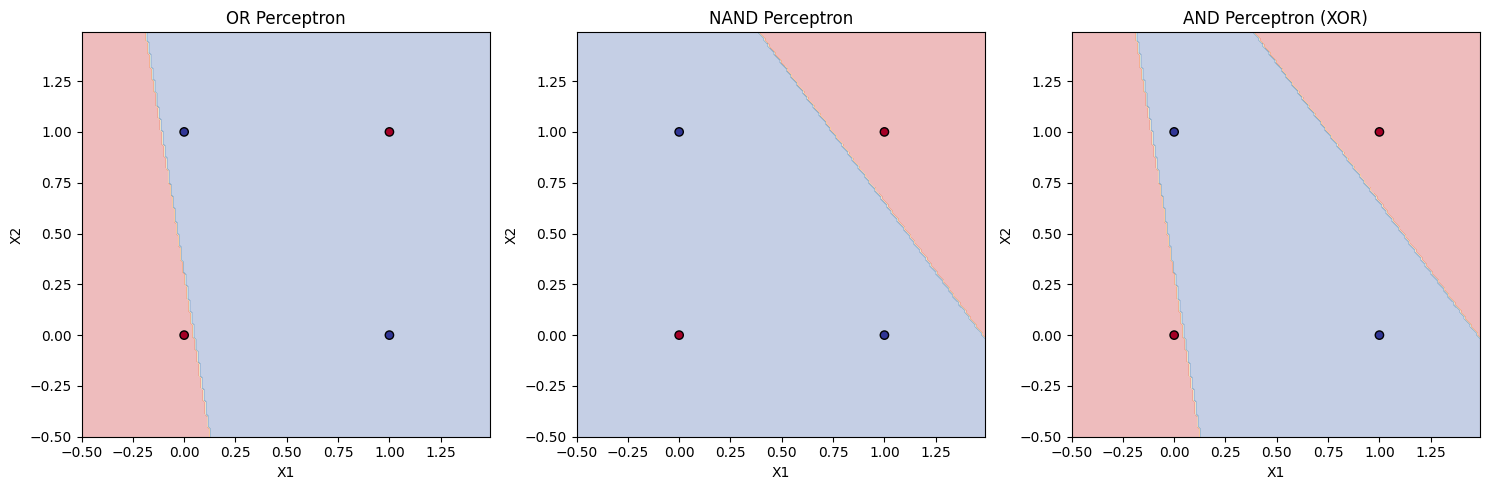

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)  # Random initialization
        self.bias = np.random.randn(1)
        self.lr = learning_rate

    def step(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        return np.array([self.step(np.dot(x, self.weights) + self.bias[0]) for x in X])

    def train(self, X, y, epochs=100):
        for _ in range(epochs):
            for x, target in zip(X, y):
                pred = self.step(np.dot(x, self.weights) + self.bias)
                error = target - pred
                self.weights += self.lr * error * x
                self.bias += self.lr * error

# Two-layer perceptron for XOR
class XORPerceptron:
    def __init__(self):
        self.or_perceptron = Perceptron(input_size=2)  # Layer 1: OR
        self.nand_perceptron = Perceptron(input_size=2)  # Layer 1: NAND
        self.and_perceptron = Perceptron(input_size=2)  # Layer 2: AND

    def train(self, X, y, epochs=1000):
        # Train OR perceptron (X1 OR X2)
        y_or = np.array([0, 1, 1, 1])  # OR truth table
        self.or_perceptron.train(X, y_or, epochs)

        # Train NAND perceptron (NOT (X1 AND X2))
        y_nand = np.array([1, 1, 1, 0])  # NAND truth table
        self.nand_perceptron.train(X, y_nand, epochs)

        # Prepare inputs for AND perceptron (outputs of OR and NAND)
        hidden_inputs = np.array([[self.or_perceptron.predict([x])[0],
                                   self.nand_perceptron.predict([x])[0]] for x in X])
        self.and_perceptron.train(hidden_inputs, y, epochs)

    def predict(self, X):
        hidden = np.array([[self.or_perceptron.predict([x])[0],
                            self.nand_perceptron.predict([x])[0]] for x in X])
        return self.and_perceptron.predict(hidden)

# Data for XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR truth table

# Train the model
model = XORPerceptron()
model.train(X, y)

# Generate truth table
print("Truth Table for XOR Implementation:")
print("X1 | X2 | OR | NAND | XOR")
print("-" * 30)
for x, pred in zip(X, model.predict(X)):
    or_out = model.or_perceptron.predict([x])[0]
    nand_out = model.nand_perceptron.predict([x])[0]
    print(f"{x[0]}  | {x[1]}  | {or_out}  | {nand_out}   | {pred}")

# Print learned weights
print("\nLearned Weights:")
print(f"OR Perceptron: Weights = {model.or_perceptron.weights}, Bias = {model.or_perceptron.bias}")
print(f"NAND Perceptron: Weights = {model.nand_perceptron.weights}, Bias = {model.nand_perceptron.bias}")
print(f"AND Perceptron: Weights = {model.and_perceptron.weights}, Bias = {model.and_perceptron.bias}")

# Visualize decision boundaries
def plot_decision_boundary(perceptron, X, title, ax, is_hidden=False):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if is_hidden:
        # For AND perceptron, inputs are OR and NAND outputs
        hidden_inputs = np.array([[model.or_perceptron.predict([g])[0],
                                   model.nand_perceptron.predict([g])[0]] for g in grid])
        Z = perceptron.predict(hidden_inputs)
    else:
        Z = perceptron.predict(grid)

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)  # Random initialization
        self.bias = np.random.randn(1)
        self.lr = learning_rate

    def step(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        return np.array([self.step(np.dot(x, self.weights) + self.bias[0]) for x in X])

    def train(self, X, y, epochs=100):
        for _ in range(epochs):
            for x, target in zip(X, y):
                pred = self.step(np.dot(x, self.weights) + self.bias)
                error = target - pred
                self.weights += self.lr * error * x
                self.bias += self.lr * error

# Two-layer perceptron for XOR
class XORPerceptron:
    def __init__(self):
        self.or_perceptron = Perceptron(input_size=2)  # Layer 1: OR
        self.nand_perceptron = Perceptron(input_size=2)  # Layer 1: NAND
        self.and_perceptron = Perceptron(input_size=2)  # Layer 2: AND

    def train(self, X, y, epochs=1000):
        # Train OR perceptron (X1 OR X2)
        y_or = np.array([0, 1, 1, 1])  # OR truth table
        self.or_perceptron.train(X, y_or, epochs)

        # Train NAND perceptron (NOT (X1 AND X2))
        y_nand = np.array([1, 1, 1, 0])  # NAND truth table
        self.nand_perceptron.train(X, y_nand, epochs)

        # Prepare inputs for AND perceptron (outputs of OR and NAND)
        hidden_inputs = np.array([[self.or_perceptron.predict([x])[0],
                                   self.nand_perceptron.predict([x])[0]] for x in X])
        self.and_perceptron.train(hidden_inputs, y, epochs)

    def predict(self, X):
        hidden = np.array([[self.or_perceptron.predict([x])[0],
                            self.nand_perceptron.predict([x])[0]] for x in X])
        return self.and_perceptron.predict(hidden)

# Data for XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR truth table

# Train the model
model = XORPerceptron()
model.train(X, y)

# Generate truth table
print("Truth Table for XOR Implementation:")
print("X1 | X2 | OR | NAND | XOR")
print("-" * 30)
for x, pred in zip(X, model.predict(X)):
    or_out = model.or_perceptron.predict([x])[0]
    nand_out = model.nand_perceptron.predict([x])[0]
    print(f"{x[0]}  | {x[1]}  | {or_out}  | {nand_out}   | {pred}")

# Print learned weights
print("\nLearned Weights:")
print(f"OR Perceptron: Weights = {model.or_perceptron.weights}, Bias = {model.or_perceptron.bias}")
print(f"NAND Perceptron: Weights = {model.nand_perceptron.weights}, Bias = {model.nand_perceptron.bias}")
print(f"AND Perceptron: Weights = {model.and_perceptron.weights}, Bias = {model.and_perceptron.bias}")

# Visualize decision boundaries
def plot_decision_boundary(perceptron, X, title, ax, is_hidden=False):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    grid = np.c_[xx.ravel(), yy.ravel()]

    if is_hidden:
        # For AND perceptron, inputs are OR and NAND outputs
        hidden_inputs = np.array([[model.or_perceptron.predict([g])[0],
                                   model.nand_perceptron.predict([g])[0]] for g in grid])
        Z = perceptron.predict(hidden_inputs)
    else:
        Z = perceptron.predict(grid)

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plot_decision_boundary(model.or_perceptron, X, "OR Perceptron", ax1)
plot_decision_boundary(model.nand_perceptron, X, "NAND Perceptron", ax2)
plot_decision_boundary(model.and_perceptron, X, "AND Perceptron (XOR)", ax3, is_hidden=True)
plt.tight_layout()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Encoder parameters: 827028
Decoder parameters: 90177
Total VAE parameters: 917205
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 239.3446 - val_loss: 124.4798
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 121.1078 - val_loss: 111.5129
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 111.5393 - val_loss: 108.0826
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 108.4927 - val_loss: 106.4660
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 106.8317 - val_loss: 105.2445
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 105.5648 - val_loss: 104.6908
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 104.7209 - val_loss: 103.9112
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 103.9989 - val_loss: 103.4414
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 103.3873 - val_loss: 103.1175
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - 

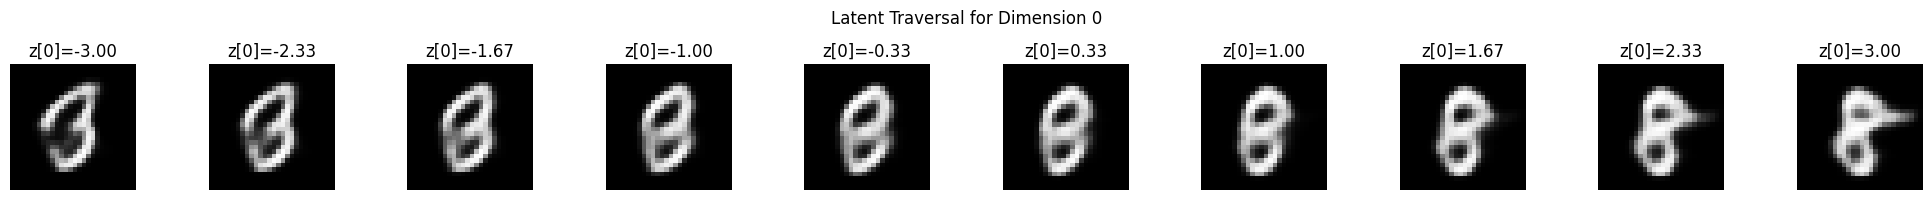

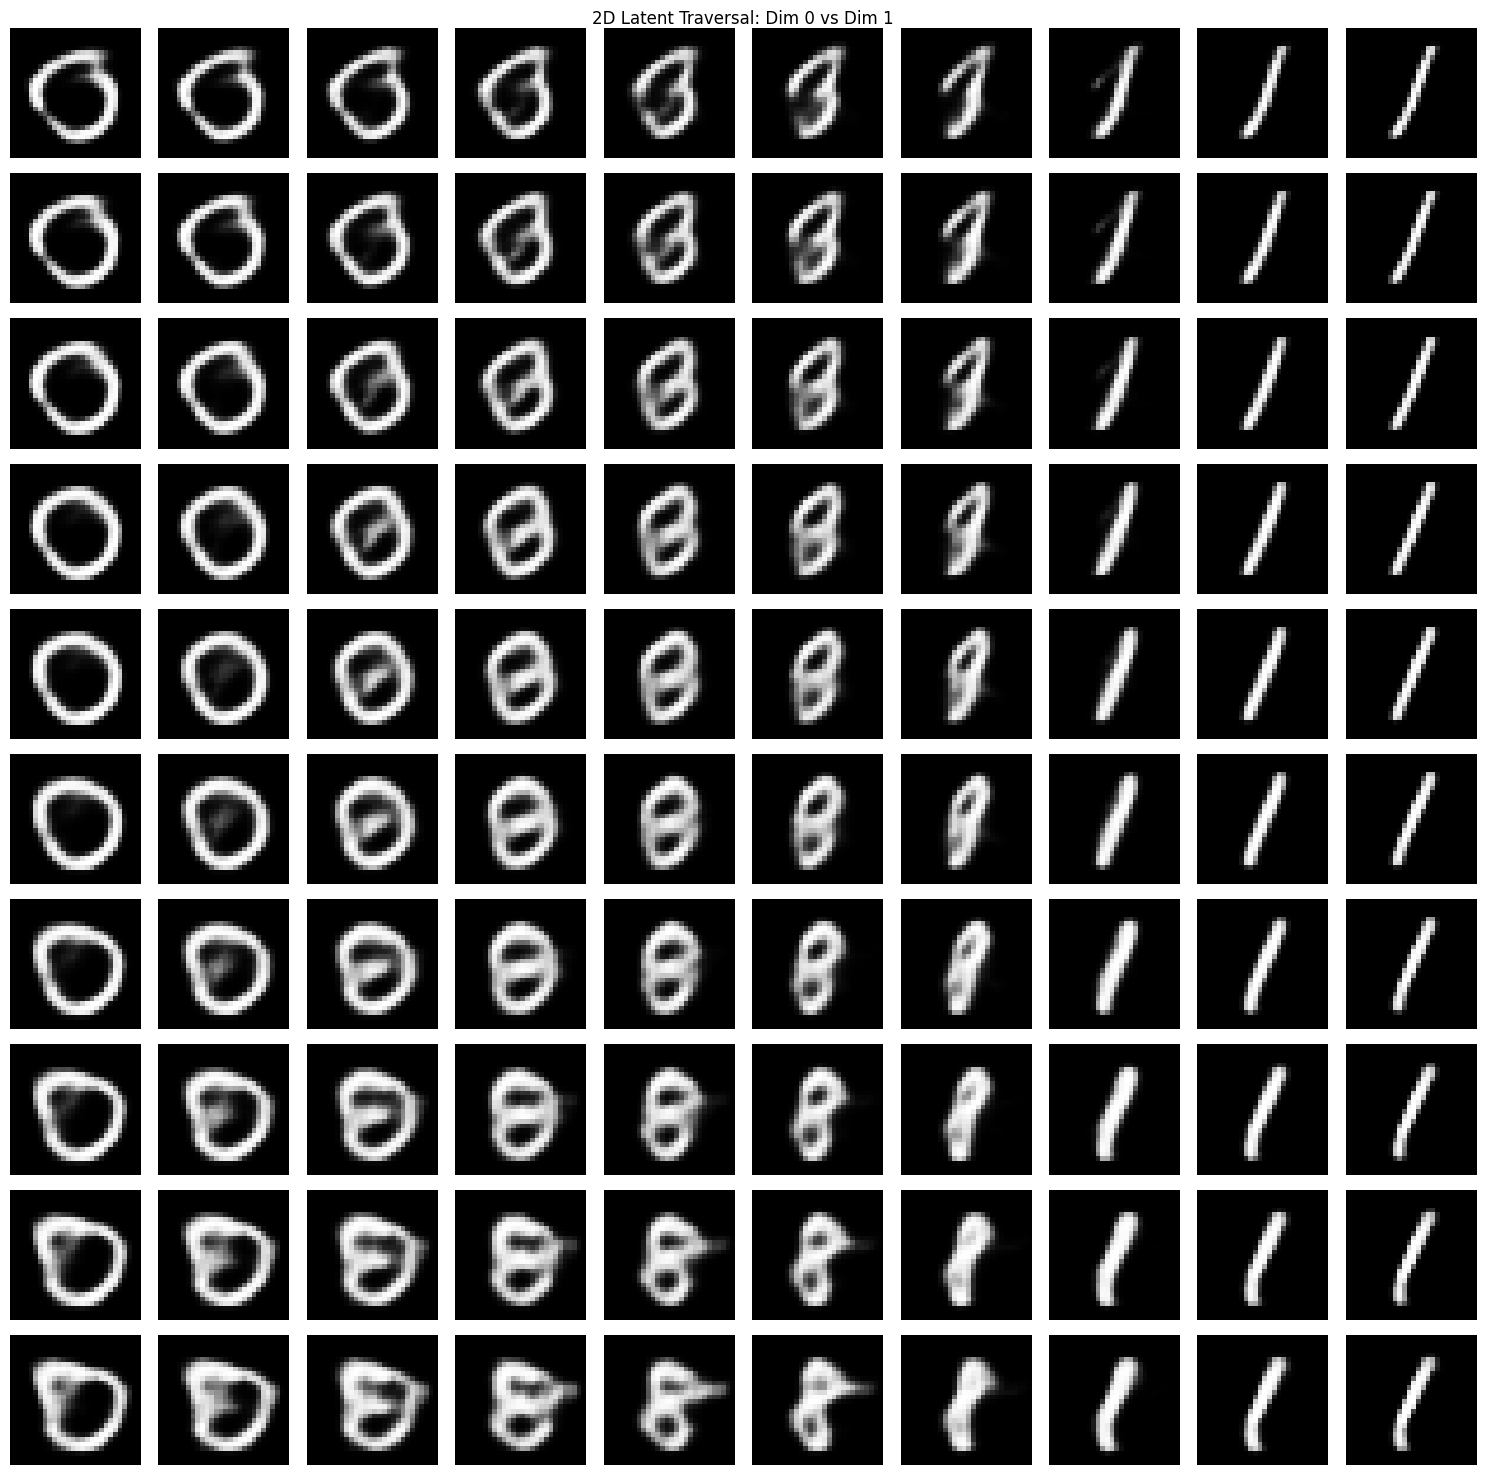

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model, backend as K

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# VAE parameters
latent_dim = 10  # Latent space dimension
chosen_dim = 0   # Latent dimension to traverse (team must choose unique dim, e.g., 0, 1, ..., 9)
input_shape = (28, 28, 1)
batch_size = 128
epochs = 20

# Encoder
inputs = layers.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu', strides=2, padding='same')(inputs)
x = layers.Conv2D(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

# Decoder
latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation='relu')(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation='relu', strides=2, padding='same')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu', strides=2, padding='same')(x)
outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

# VAE model with custom loss
class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        # Add reconstruction and KL divergence losses
        reconstruction_loss = tf.reduce_mean(
            K.binary_crossentropy(inputs, reconstructed) * 28 * 28
        )
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        total_loss = reconstruction_loss + kl_loss
        self.add_loss(total_loss)
        return reconstructed

vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')

# Count number of parameters
encoder_params = encoder.count_params()
decoder_params = decoder.count_params()
total_params = encoder_params + decoder_params
print(f"Encoder parameters: {encoder_params}")
print(f"Decoder parameters: {decoder_params}")
print(f"Total VAE parameters: {total_params}")

# Train VAE
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))

# Latent traversal visualization
n_steps = 10  # Number of steps for traversal
traversal_range = np.linspace(-3, 3, n_steps)  # Traverse from -3 to 3
fig, axes = plt.subplots(1, n_steps, figsize=(n_steps * 2, 2))

for i, val in enumerate(traversal_range):
    # Create latent vector: vary chosen_dim, others set to 0
    z_sample = np.zeros((1, latent_dim))
    z_sample[0, chosen_dim] = val
    # Generate image
    generated = decoder.predict(z_sample, verbose=0)
    # Plot image
    axes[i].imshow(generated[0, :, :, 0], cmap='gray')
    axes[i].set_title(f'z[{chosen_dim}]={val:.2f}')
    axes[i].axis('off')

plt.suptitle(f'Latent Traversal for Dimension {chosen_dim}')
plt.tight_layout()
plt.savefig('latent_traversal.png')
plt.show()

# Generate 2D grid for PPT (optional)
n = 10  # 10x10 grid
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)
fig, axes = plt.subplots(n, n, figsize=(15, 15))

for i, xi in enumerate(grid_x):
    for j, yi in enumerate(grid_y):
        z_sample = np.zeros((1, latent_dim))
        z_sample[0, chosen_dim] = xi
        z_sample[0, (chosen_dim + 1) % latent_dim] = yi  # Vary a second dimension
        generated = decoder.predict(z_sample, verbose=0)
        axes[i, j].imshow(generated[0, :, :, 0], cmap='gray')
        axes[i, j].axis('off')

plt.suptitle(f'2D Latent Traversal: Dim {chosen_dim} vs Dim {(chosen_dim + 1) % latent_dim}')
plt.tight_layout()
plt.savefig('latent_traversal_2d.png')
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.datasets import imdb
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load IMDb dataset
max_words = 10000
max_len = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Decode review for visualization
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}
def decode_review(sequence):
    return ' '.join([reverse_word_index.get(i - 5, '?') for i in sequence if i > 2])

# Select a review (index 2; assumed for The Dark Knight, verify uniqueness)
review_idx = 2
selected_review = x_test[review_idx]
review_text = decode_review(selected_review)
print(f"Selected IMDb Review (assumed for The Dark Knight 2008): {review_text}")

# Transformer attention layer
class AttentionLayer(layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.W = layers.Dense(units)
        self.V = layers.Dense(1)

    def call(self, inputs):
        score = self.V(tf.nn.tanh(self.W(inputs)))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights

# Build model
inputs = layers.Input(shape=(max_len,))
embedding = layers.Embedding(max_words, 128)(inputs)
lstm = layers.LSTM(64, return_sequences=True)(embedding)
context, attention_weights = AttentionLayer(64)(lstm)
dense = layers.Dense(64, activation='relu')(context)
outputs = layers.Dense(1, activation='sigmoid')(dense)
model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Store attention weights during training
attention_weights_history = []

# Custom callback to save attention weights
class AttentionCallback(tf.keras.callbacks.Callback):
    def __init__(self, model, review):
        super(AttentionCallback, self).__init__()
        self.model = model
        self.review = review

    def on_epoch_end(self, epoch, logs=None):
        # Create a submodel to extract attention weights
        attention_model = tf.keras.Model(inputs=self.model.input,
                                         outputs=self.model.layers[3].output)  # Adjust index as needed
        attention_weights = attention_model.predict(self.review[np.newaxis, :], verbose=0)
        attention_weights_history.append(attention_weights)

# Train model
callback = AttentionCallback(model, selected_review)
model.fit(x_train, y_train, epochs=5, batch_size=64,
          validation_data=(x_test, y_test), callbacks=[callback], verbose=1)

# Prepare data for animation
words = review_text.split()
words = words[:max_len] if len(words) > max_len else words + [''] * (max_len - len(words))
attention_data = np.array(attention_weights_history)[:, :, 0]

# Create animation
fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.matshow(attention_data[0].reshape(1, -1), cmap='viridis')
plt.colorbar(cax, label='Attention Weight')
ax.set_xticks(np.arange(len(words)))
ax.set_xticklabels(words, rotation=45, ha='left')
ax.set_yticks([])

def animate(i):
    cax.set_array(attention_data[i].reshape(1, -1))
    ax.set_title(f'Attention Weights at Epoch {i+1}')
    return [cax]

anim = FuncAnimation(fig, animate, frames=len(attention_data), interval=1000, blit=True)
anim.save('attention_evolution.mp4', writer='ffmpeg', fps=1)
plt.close()

# Display static final attention weights
plt.figure(figsize=(12, 2))
plt.imshow(attention_data[-1].reshape(1, -1), cmap='viridis')
plt.colorbar(label='Attention Weight')
plt.xticks(np.arange(len(words)), words, rotation=45, ha='left')
plt.yticks([])
plt.title('Final Attention Weights (Epoch 5)')
plt.tight_layout()
plt.savefig('final_attention.png')
plt.show()


Selected IMDb Review (assumed for The Dark Knight 2008): ? lifted and i expand 1st star br even have haven't a story it that the or i'm disappointed series like series film are see paula is black good his most with particular you entirely and means ? movie double that the french and accents them have ? notably consequences scripts football like empty is ? fever like too fast and too fighting i ready don't east us ? of climbs all just the element movie time the images he is don't biting its with don't ten of very casting


AttributeError: property 'model' of 'AttentionCallback' object has no setter